# Bile Acids
Compare placebo v. letrozole and letrozole v. let-co-housed at time points 2 and 5.

In [1]:
library(tidyverse)
library(magrittr)
source("/Users/cayla/ANCOM/scripts/ancom_v2.1.R")

── Attaching packages ───────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ──────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract



Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"



Attaching package: ‘compositions’


The following objects are masked from ‘package:stats’:

    cor, cov, dist, var


The following objects are masked from ‘package:base’:

    %*%, norm, scale, scale.default




In [2]:
counts <- read_csv('https://github.com/bryansho/PCOS_WGS_16S_metabolome/raw/master/DESEQ2/Bile_Acids/Bile_Acids_Cutoff.csv')
head(counts, n=1)


── Column specification ──────────────────────────────────────────────────
cols(
  .default = col_double()
)
ℹ Use `spec()` for the full column specifications.




OTUs,571.T0_RA2_01_33058,582.T1_RD8_01_33104,586.T5_BG8_01_33378,571.T2_RF6_01_33131,578.CT5_RA11_01_33408,576.T5_BF11_01_33368,581.T4_BD7_01_33212,584.T5_BG6_01_33376,585.T0_RB3_01_33073,⋯,595.T0_RB12_01_33082,580.T1_RD6_01_33102,600.T1_RF1_01_33123,603.T0_RC8_01_33091,577.T1_RD4_01_33100,591.T0_RB8_01_33078,572.T2_RF7_01_33132,593.T3_BB10_01_33189,594.T4_BE7_01_33351,592.T2_RH1_01_33152
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,4206,⋯,0,0,8326,0,0,0,0,0,0,0


In [3]:
counts$OTUs <- as.factor(counts$OTUs)

In [4]:
metadata <- read_csv('https://github.com/bryansho/PCOS_WGS_16S_metabolome/raw/master/DESEQ2/Bile_Acids/Mapping_file_w_og.csv')
head(metadata, n=1)


── Column specification ──────────────────────────────────────────────────
cols(
  .default = col_character(),
  Mouse = col_double(),
  weight = col_double(),
  Lh = col_double(),
  Testosterone = col_double(),
  Weight_g = col_double(),
  observed_SVs1250 = col_double(),
  pielou_e1250 = col_double(),
  faith_pd1250 = col_double(),
  shannon1250 = col_double(),
  FBG = col_double()
)
ℹ Use `spec()` for the full column specifications.




SampleID,BarcodeSequence,LinkerPrimerSequence,filename,ID_OG_MAP,Barcode,adaptor,TSRI_Seq_plate,Well_Position,Sequenc_ Name,⋯,Insulin,Testosterone,Weight_g,observed_SVs1250,pielou_e1250,faith_pd1250,shannon1250,FBG,Description,ATTRIBUTE_GNPSDefaultGroup
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
603.T0_RC8_01_33091,GATACA,GATACA,603.T0_RC8_01_33091.mzXML,603.T0,ACATACTGAGCA,CCGGACTACHVGGGTWTCTAAT,Plate1,C08,806rcbc245,⋯,NA,NA,17.7,248,0.9424862,9.497725,7.49672,NA,603.T0,G1


In [5]:
metadata %<>% select(SampleID, Week, Category)

In [6]:
indices <- read_csv('https://github.com/bryansho/PCOS_WGS_16S_metabolome/raw/master/DESEQ2/Bile_Acids/taxonomy_cutoff.csv')
head(indices, n=1)


── Column specification ──────────────────────────────────────────────────
cols(
  OTUs = col_double(),
  Domain = col_character(),
  Phylum = col_character(),
  Class = col_character(),
  Order = col_character(),
  Family = col_character(),
  Genus = col_character(),
  Species = col_character()
)




OTUs,Domain,Phylum,Class,Order,Family,Genus,Species
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester,α-Hyodeoxycholic acid methyl ester,.alpha.-Hyodeoxycholic acid methyl ester


In [7]:
indices$OTUs <- as.factor(indices$OTUs)
indices %<>% rename(BA = Domain)
indices[,3:8] <- NULL

In [8]:
# subset data and metadata
meta.t2.PvL <- metadata %>% filter(Week == '2', Category == 'Placebo' | Category == 'Letrozole')
t2.PvL <- counts %>% select(OTUs, any_of(meta.t2.PvL$SampleID)) %>% column_to_rownames('OTUs')

meta.t2.LvLCH <- metadata %>% filter(Week == '2', Category == 'Co-L' | Category == 'Letrozole')
t2.LvLCH <- counts %>% select(OTUs, any_of(meta.t2.LvLCH$SampleID)) %>% column_to_rownames('OTUs')



meta.t5.PvL <- metadata %>% filter(Week == '5', Category == 'Placebo' | Category == 'Letrozole')
t5.PvL <- counts %>% select(OTUs, any_of(meta.t5.PvL$SampleID)) %>% column_to_rownames('OTUs')

meta.t5.LvLCH <- metadata %>% filter(Week == '5', Category == 'Co-L' | Category == 'Letrozole')
t5.LvLCH <- counts %>% select(OTUs, any_of(meta.t5.LvLCH$SampleID)) %>% column_to_rownames('OTUs')

## Time Point 2
### Placebo v. Letrozole

In [9]:
# Data Preprocessing

# feature_table is a df/matrix with features as rownames and samples in columns
feature_table <- t2.PvL 
sample_var <- "SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t2.PvL, sample_var, group_var, 
                                    out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table1 <- prepro$feature_table

# Preprocessed metadata
meta_data1 <- prepro$meta_data 

# Structural zero info
struc_zero1 <- prepro$structure_zeros 

In [10]:
# Run ANCOM

main_var <- "Category"
p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction
alpha <- 0.05
adj_formula <- NULL 
rand_formula <- NULL

t_start <- Sys.time()

res <- ANCOM(feature_table1, meta_data1, struc_zero1, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res$out, "2021-07-26_BAs_T2_PvL_ANCOM_data.csv")

Time difference of 0.8741422 secs

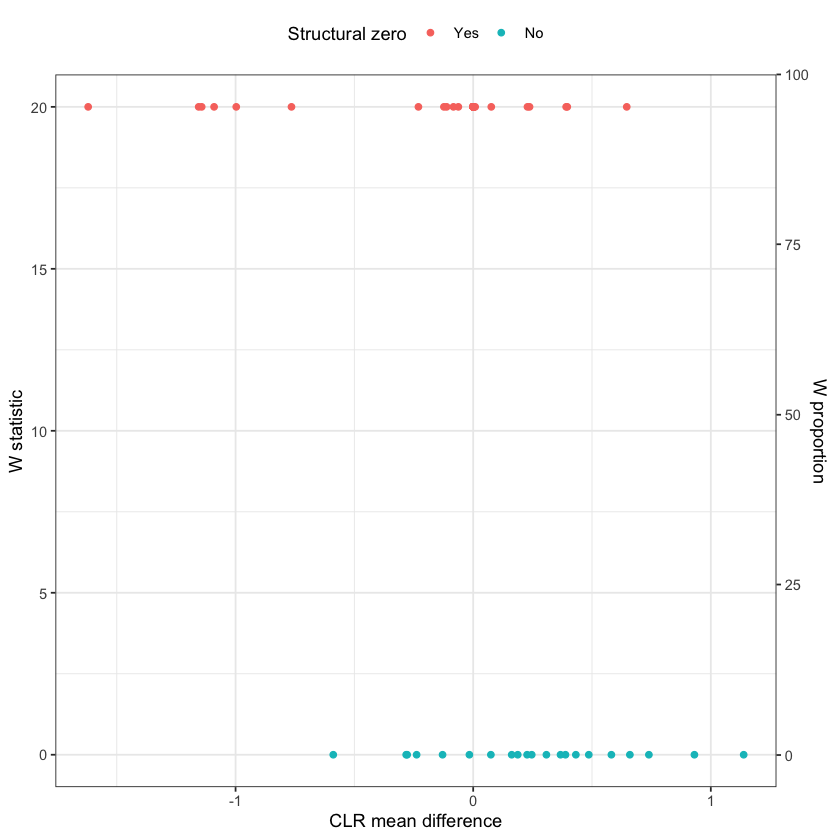

In [11]:
n_taxa <- ifelse(is.null(struc_zero1), nrow(feature_table1), sum(apply(struc_zero1, 1, sum) == 0))
res$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / n_taxa, name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_BAs_T2_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [12]:
# save features with W > 0 
non.zero <- res$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>%
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_BileAcids_T2_PvL.csv',sep='_'))

In [12]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>% 
    filter(y >= (0.7*n_taxa)) # keep significant taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_BAs_T2_PvL.csv',sep='_'))

Saving 7 x 7 in image



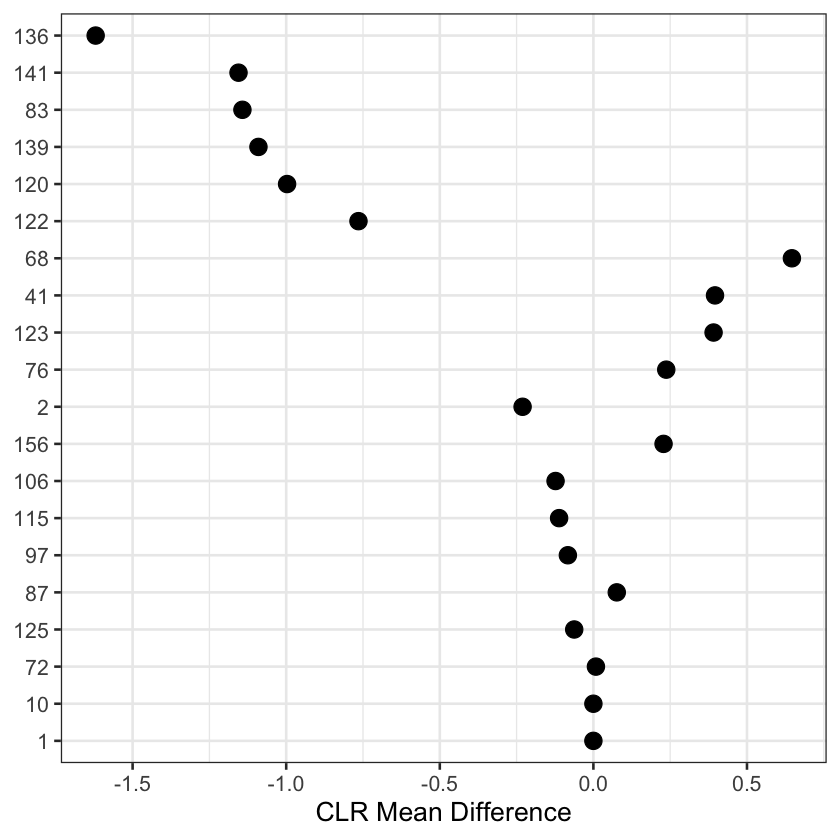

In [13]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>% 
    mutate(taxa_id = fct_reorder(taxa_id, (abs(x)))) %>% 
    ggplot(aes(x, taxa_id)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = "none") +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_BAs_T2_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

### Letrozole v. Let-co-housed

In [13]:
# Data Preprocessing

# feature_table is a df/matrix with features as rownames and samples in columns
feature_table <- t2.LvLCH 
sample_var <- "SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t2.LvLCH, sample_var, group_var, 
                                    out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table2 <- prepro$feature_table

# Preprocessed metadata
meta_data2 <- prepro$meta_data 

# Structural zero info
struc_zero2 <- prepro$structure_zeros 

In [14]:
# Run ANCOM

main_var <- "Category"
p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction
alpha <- 0.05
adj_formula <- NULL 
rand_formula <- NULL

t_start <- Sys.time()

res2 <- ANCOM(feature_table2, meta_data2, struc_zero2, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
#write_csv(res2$out, "2021-07-26_BAs_T2_LvLCH_ANCOM_data.csv")

Time difference of 0.451546 secs

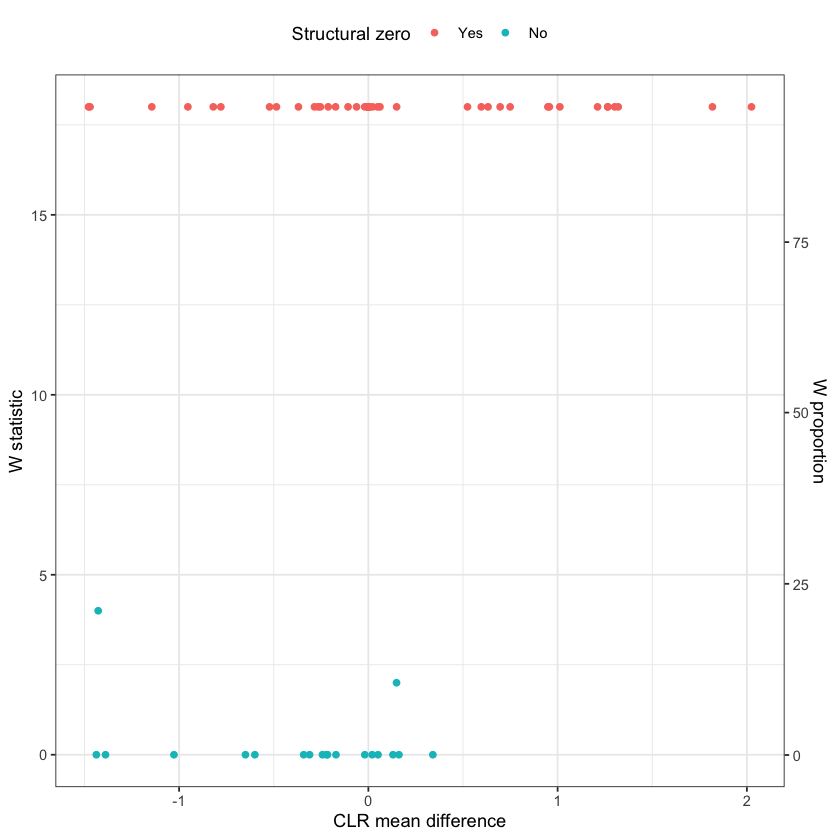

In [15]:
n_taxa <- ifelse(is.null(struc_zero2), nrow(feature_table2), sum(apply(struc_zero2, 1, sum) == 0))
res2$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / n_taxa, name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_BAs_T2_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [16]:
# save features with W > 0 
non.zero <- res2$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>%
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_BileAcids_T2_LvLCH.csv',sep='_'))

In [17]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res2$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>% 
    filter(y >= (0.7*n_taxa)) # keep significant taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_BAs_T2_LvLCH.csv',sep='_'))

Saving 7 x 7 in image



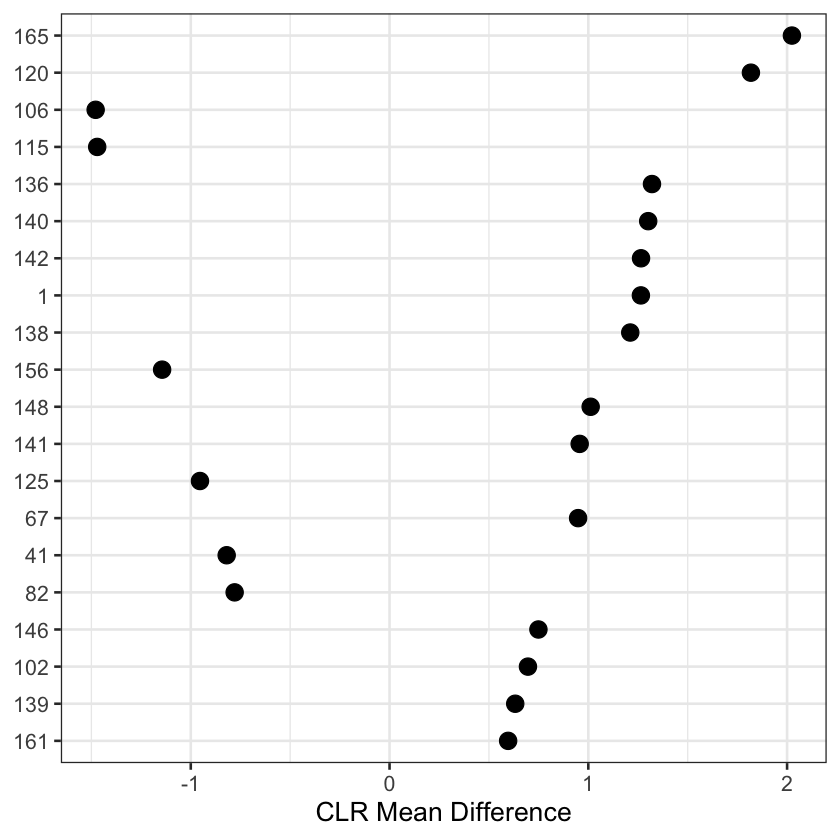

In [18]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>% 
    mutate(taxa_id = fct_reorder(taxa_id, (abs(x)))) %>% 
    ggplot(aes(x, taxa_id)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = "none") +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_BAs_T2_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

## Time Point 5
### Placebo v. Letrozole

In [17]:
# Data Preprocessing

# feature_table is a df/matrix with features as rownames and samples in columns
feature_table <- t5.PvL 
sample_var <- "SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t5.PvL, sample_var, group_var, 
                                    out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table3 <- prepro$feature_table

# Preprocessed metadata
meta_data3 <- prepro$meta_data 

# Structural zero info
struc_zero3 <- prepro$structure_zeros 

In [18]:
# Run ANCOM

main_var <- "Category"
p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction
alpha <- 0.05
adj_formula <- NULL 
rand_formula <- NULL

t_start <- Sys.time()

res3 <- ANCOM(feature_table3, meta_data3, struc_zero3, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res3$out, "2021-07-26_BAs_T5_PvL_ANCOM_data.csv")

Time difference of 0.412271 secs

Saving 7 x 7 in image



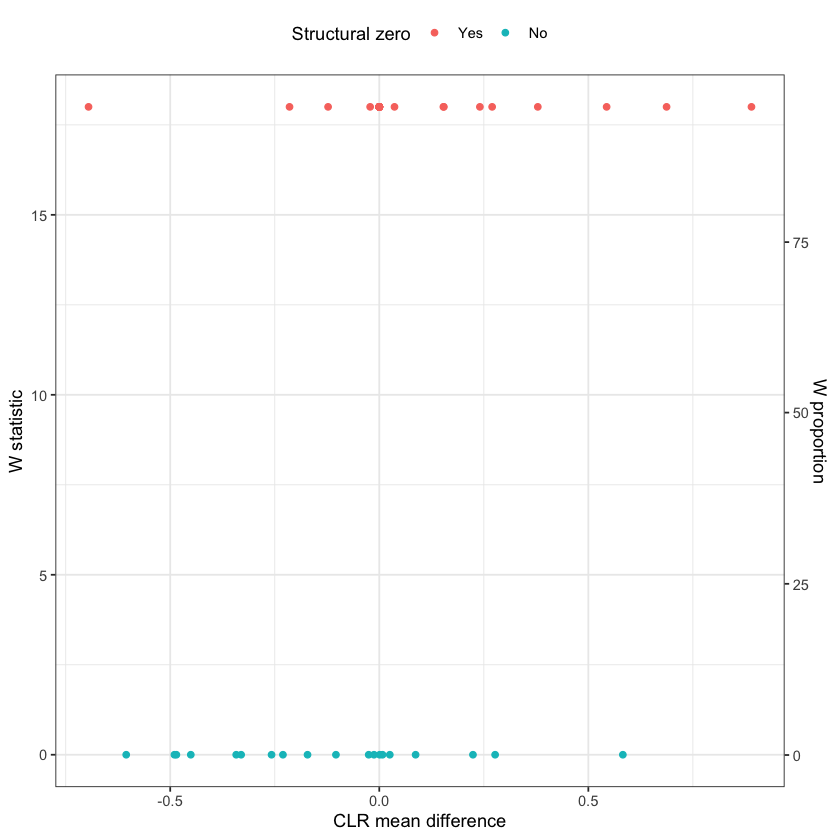

In [21]:
n_taxa <- ifelse(is.null(struc_zero3), nrow(feature_table3), sum(apply(struc_zero3, 1, sum) == 0))
res3$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / n_taxa, name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_BAs_T5_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [19]:
# save features with W > 0 
non.zero <- res3$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>%
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_BileAcids_T5_PvL.csv',sep='_'))

In [22]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res3$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>% 
    filter(y >= (0.7*n_taxa)) # keep significant taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_BAs_T5_PvL.csv',sep='_'))

Saving 7 x 7 in image



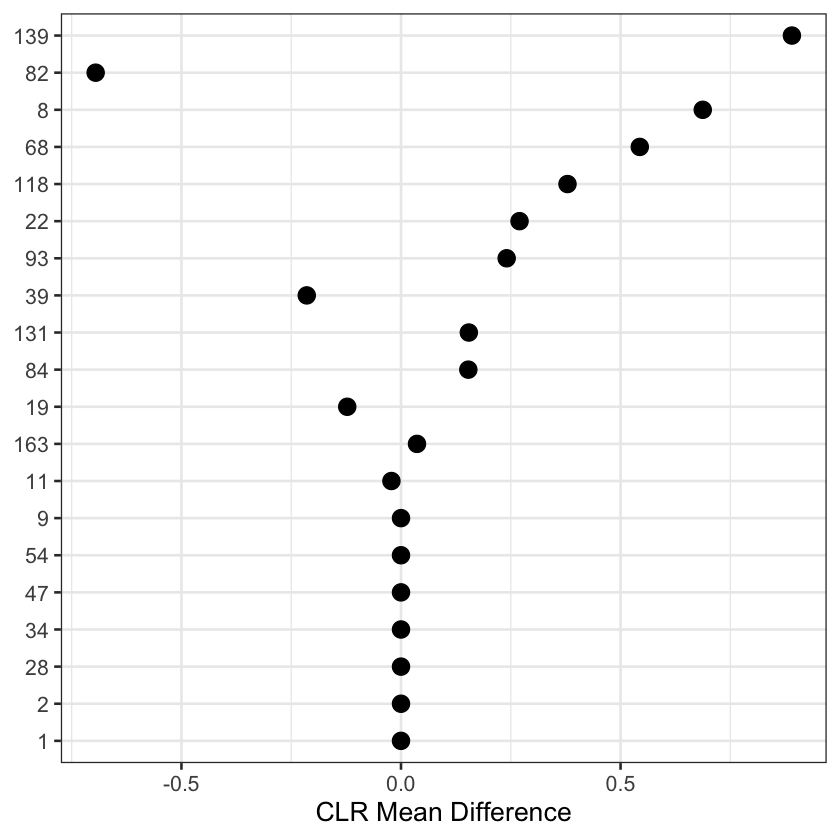

In [23]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>% 
    mutate(taxa_id = fct_reorder(taxa_id, (abs(x)))) %>% 
    ggplot(aes(x, taxa_id)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = "none") +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_BAs_T5_PvL.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

### Letrozole v. Let-co-housed

In [20]:
# Data Preprocessing

# feature_table is a df/matrix with features as rownames and samples in columns
feature_table <- t5.LvLCH 
sample_var <- "SampleID"
group_var <- "Category"
out_cut <- 0.05
zero_cut <- 0.90 
lib_cut <- 0
neg_lb <- TRUE

prepro <- feature_table_pre_process(feature_table, meta.t5.LvLCH, sample_var, group_var, 
                                    out_cut, zero_cut, lib_cut, neg_lb)

# Preprocessed feature table
feature_table4 <- prepro$feature_table

# Preprocessed metadata
meta_data4 <- prepro$meta_data 

# Structural zero info
struc_zero4 <- prepro$structure_zeros 

In [21]:
# Run ANCOM

main_var <- "Category"
p_adj_method <- "BH" # number of taxa > 10, therefore use Benjamini-Hochberg correction
alpha <- 0.05
adj_formula <- NULL 
rand_formula <- NULL

t_start <- Sys.time()

res4 <- ANCOM(feature_table4, meta_data4, struc_zero4, main_var, p_adj_method, 
            alpha, adj_formula, rand_formula)

t_end <- Sys.time()
t_end - t_start 

# write output to file
# output contains the "W" statistic for each taxa - a count of the number of times 
# the null hypothesis is rejected for each taxa
# detected_x are logicals indicating detection at specified FDR cut-off
write_csv(res4$out, "2021-07-26_BAs_T5_LvLCH_ANCOM_data.csv")

Time difference of 0.5956452 secs

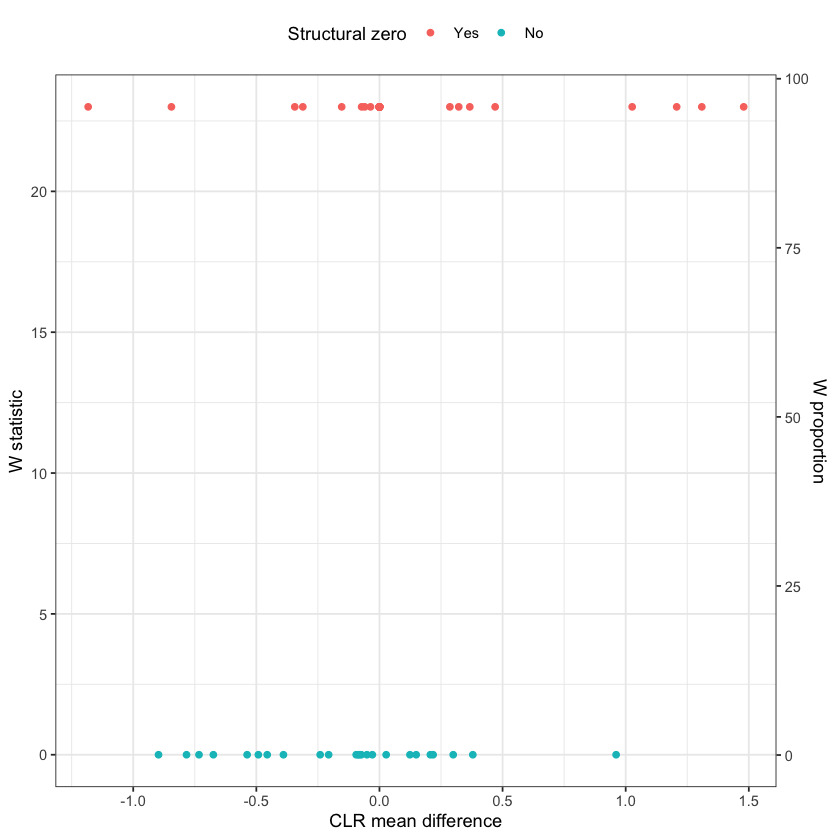

In [22]:
n_taxa <- ifelse(is.null(struc_zero4), nrow(feature_table4), sum(apply(struc_zero4, 1, sum) == 0))
res4$fig + scale_y_continuous(sec.axis = sec_axis(~ . * 100 / n_taxa, name = 'W proportion'))
ggsave(filename = paste(lubridate::today(),'volcano_BAs_T5_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')

In [23]:
# save features with W > 0 
non.zero <- res4$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>%
    mutate(W.proportion = y/(n_taxa-1)) %>% # add W    
    filter(W.proportion > 0) %>% 
    rowid_to_column()
    
write.csv(non.zero, paste(lubridate::today(),'NonZeroW_Features_BileAcids_T5_LvLCH.csv',sep='_'))

In [27]:
# to find most significant taxa, I will sort the data 
# 1) y (W statistic)
# 2) according to the absolute value of CLR mean difference
sig <- res4$fig$data %>% 
    arrange(desc(y), desc(abs(x))) %>% 
    left_join(indices, by = c('taxa_id' = 'OTUs')) %>% 
    filter(y >= (0.7*n_taxa)) # keep significant taxa

write.csv(sig, paste(lubridate::today(),'SigFeatures_BAs_T5_LvLCH.csv',sep='_'))

Saving 7 x 7 in image



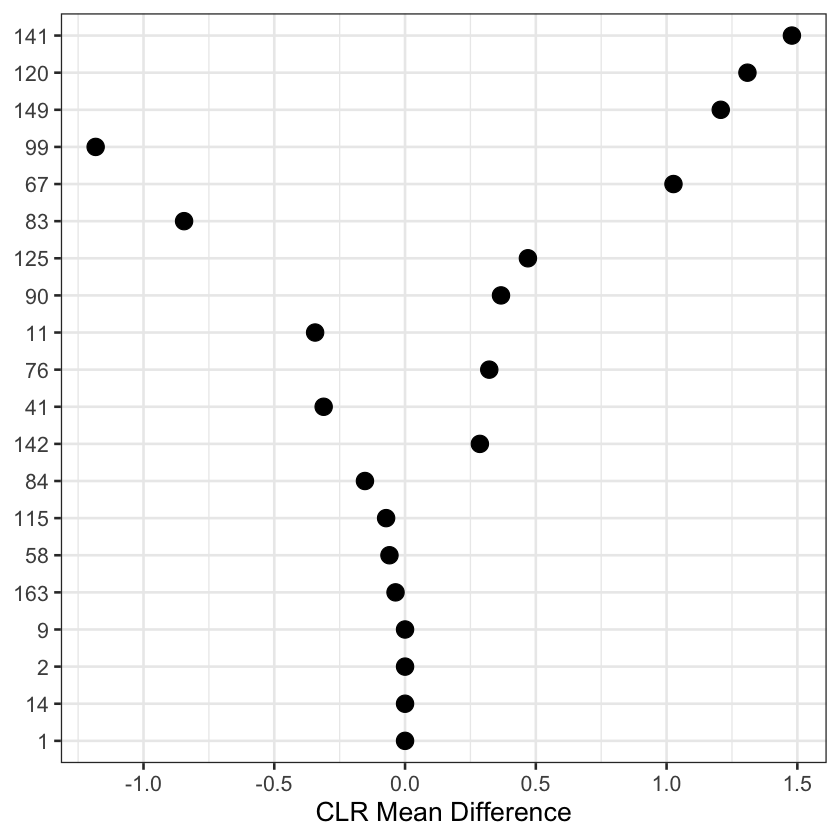

In [28]:
# plot top 20 taxa
sig %>% 
    slice_head(n=20) %>%
    mutate(taxa_id = fct_reorder(taxa_id, (abs(x)))) %>% 
    ggplot(aes(x, taxa_id)) +
    geom_point(aes(size = 1)) +
    theme_bw(base_size = 16) + 
    guides(size = "none") +
    labs(x = 'CLR Mean Difference', y = NULL)

ggsave(filename = paste(lubridate::today(),'Top20_BAs_T5_LvLCH.pdf',sep='_'), bg = 'transparent', device = 'pdf', dpi = 'retina')